In [3]:
%run 0.objects.ipynb

Creating our first option

In [7]:
e=EuCall(5,100,100,0.03,0.01,0.4,100)
print(e)

100x EUCALL Strike=100


In [8]:
print('Theoretical value:',np.round(e.theovalue(),2))
print('Delta',np.round(e.delta(),2))
print('Market value',np.round(e.marketvalue(),2))
print(e)

Theoretical value: 35.99
Delta 0.68
Market value 3598.97
100x EUCALL Strike=100


<hr>
<br>
Create a Call spread : <br>
Long Call Strike 100 +  Short Call Strike 120
<br>
Maturity : 1 yr


In [9]:
p = Portfolio()
p.clear()
c_100=EuCall(1,100,100,0.03,0.01,0.4,1)
print(c_100)
c_120=EuCall(1,100,120,0.03,0.01,0.4,-1)
print(c_120)

1x EUCALL Strike=100
-1x EUCALL Strike=120


In [10]:
p.add(c_100)
p.add(c_120)
p.marketvalue()

6.820284655456685

Looping over the structure:

In [11]:
print('Total Delta:',p.totaldelta())
for o in p.holding:
    print(o,' (delta=',np.round(o.delta(),2),')')

Total Delta: 17.844073324432173
1x EUCALL Strike=100  (delta= 0.59 )
-1x EUCALL Strike=120  (delta= 0.41 )


In [12]:
s = np.arange(80.0,200.00,1)

In [13]:
mv = np.zeros_like(s)
d = np.zeros_like(s)
for i in np.arange(0,len(s)):
    p.set_underlying(s[i])
    mv[i] = p.marketvalue()
    d[i] = p.totaldelta()

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

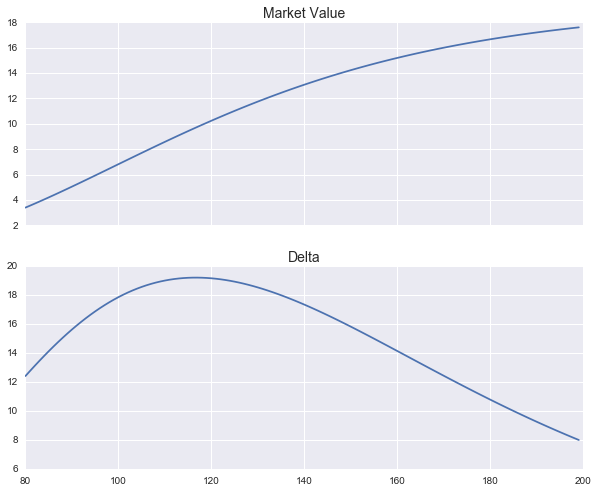

In [15]:
fig , ax = plt.subplots(2,1,figsize=(10,8),sharex=True)
ax[0].plot(s,mv)
ax[0].set_title('Market Value',fontsize=14)
ax[1].plot(s,d)
ax[1].set_title('Delta',fontsize=14);
